<a href="https://colab.research.google.com/github/Kevin-Alvares/Portfolio/blob/main/Confidence%20Interval/Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Confidence Interval and CLT**

#**Problem Statement :** An American multinational retail corporation wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [ ]:
#importing all the required libraries

from scipy.stats import norm, binom, geom, percentileofscore
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/CI_data.csv?1641285094" -O CI.csv

In [ ]:
data = pd.read_csv("CI.csv")

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
#shape of the data

data.shape

(550068, 10)

In [ ]:
data.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

**Insight :** user id, occupation, marital status, product category data types will need to be converted to 'categories'.

In [ ]:
#converting to 'category'

columns=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
data[columns]=data[columns].astype('object')

In [ ]:
data.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
#Finding null values

data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Insight** : No null values found


In [ ]:
data.describe(include= 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


**Initial Insight :**

1.   There are multiple duplicates present in the data for User_ID, Product_ID.
2.   There are 5891 unique values for User_ID and 3631 unique Product_IDs.
3. The highest purchase amount i.e. 23,961 is from User_ID: 1001680.
4. Out of the 7 unique age groups, 26-35 has the highest number of purchases.
5. Out of the 2 genders, Males seeem to make more purchases with 414,259 out of the 550,068 being males.
6. From 21 unique values of occupation, customers belonging to 4 make the most purchases.
7. Out of the 3 cities A,B and C, city B has the most purchases.
8. Currently customers who have stayed in the city for 1 year make the most purchases.
9. Single customers seem to make more purchases than married.
10. Of the 20 unique product categories, 5 seems to be performing the best
11. The minimum purchase amount is 12 and the maximum being 23,961.
12. The difference between the mean and median in Purchase indicates the presence of outliers
13. The large value for standard deviation of Purchase indicates a larger spread for this attribute



In [ ]:
data["Gender"].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [ ]:
data["Age"].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [ ]:
data["Occupation"].value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [ ]:
data["City_Category"].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [ ]:
data["Stay_In_Current_City_Years"].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
data["Marital_Status"].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [ ]:
data["Product_Category"].value_counts(normalize=True)

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

**Insights :**

1. 75% of purchases are males
2. Almost ≈40% of purchases are in the age group 26-35 and almost ≈76% of purchases are between the age group 18-45
3. We now see there are 20 unique occupations, with 4 and 7 being the highest purchases from those who have an occupation and a significant number of purchases from those without occupation as well.
4. City B has 42% of purchases of the 3.
5. Those staying in the city for 1 year make up 35% of purchases, 18% for 2 years and 17% for 3 years.
6. Singles make up ≈60% of purchases
7. Product category 5,1 and 8 seem to be performing the best , making up 72% of the purchases. Product category 9 is the poorest performing of the 20

## **Visual Analysis : Univariate and Bivariate**

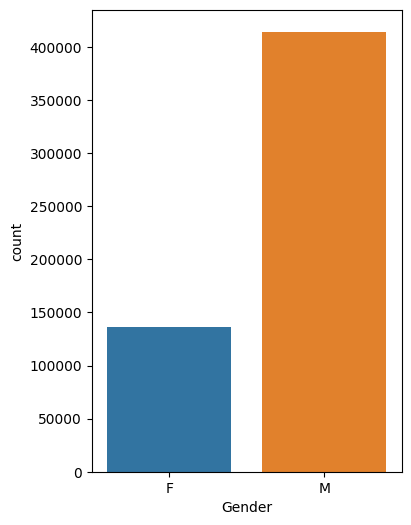

In [ ]:
plt.figure(figsize=(4, 6))
sns.countplot(data=data,x=data["Gender"])
plt.show()

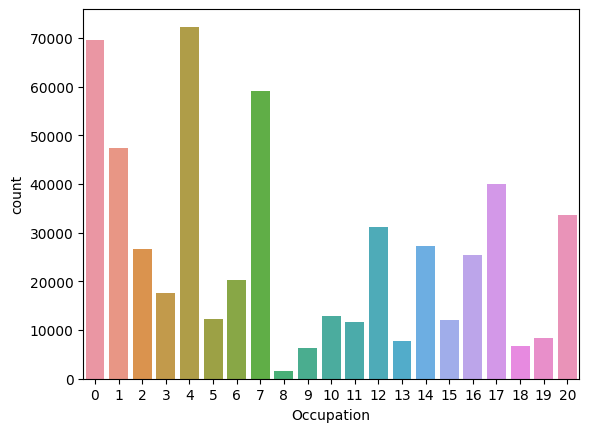

In [ ]:
sns.countplot(data=data,x=data["Occupation"])
plt.show()

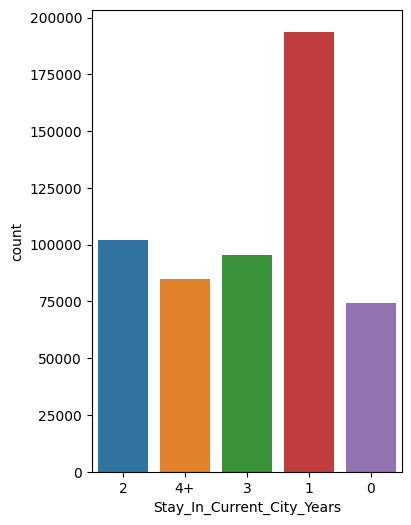

In [ ]:
plt.figure(figsize=(4, 6))
sns.countplot(data=data,x=data["Stay_In_Current_City_Years"])
plt.show()

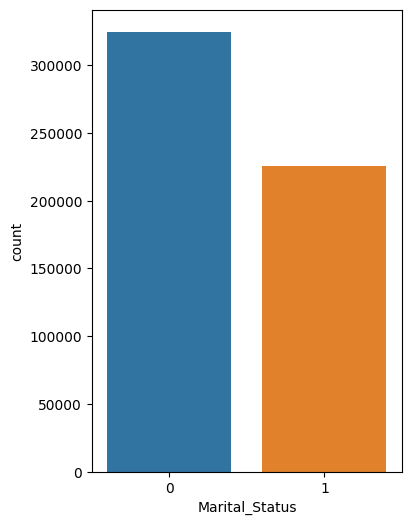

In [ ]:
plt.figure(figsize=(4, 6))
sns.countplot(data=data,x=data["Marital_Status"])
plt.show()

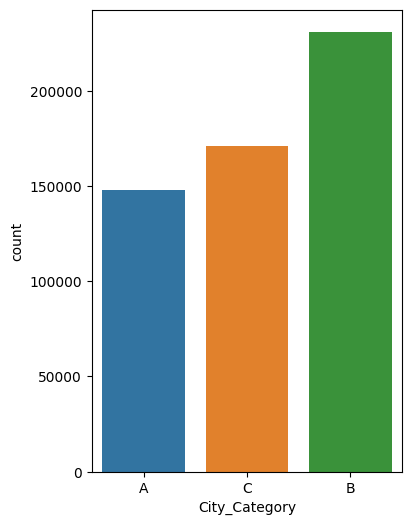

In [ ]:
plt.figure(figsize=(4, 6))
sns.countplot(data=data,x=data["City_Category"])
plt.show()

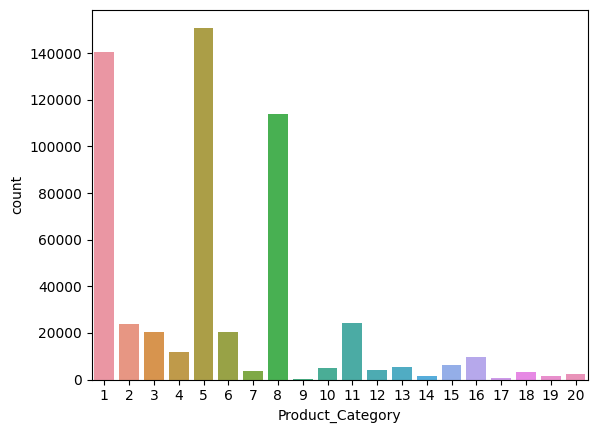

In [ ]:
sns.countplot(data=data,x=data["Product_Category"])
plt.show()

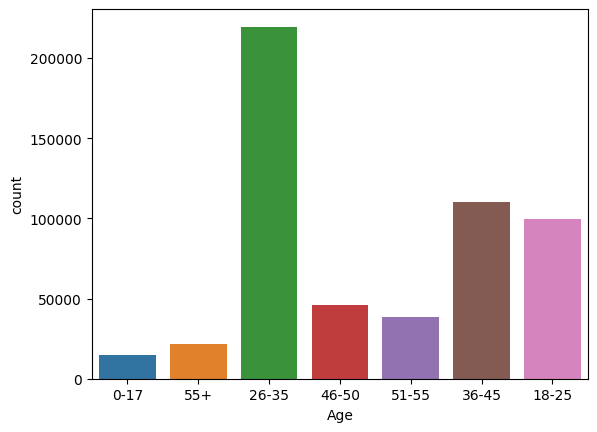

In [ ]:
sns.countplot(data=data,x=data["Age"])
plt.show()

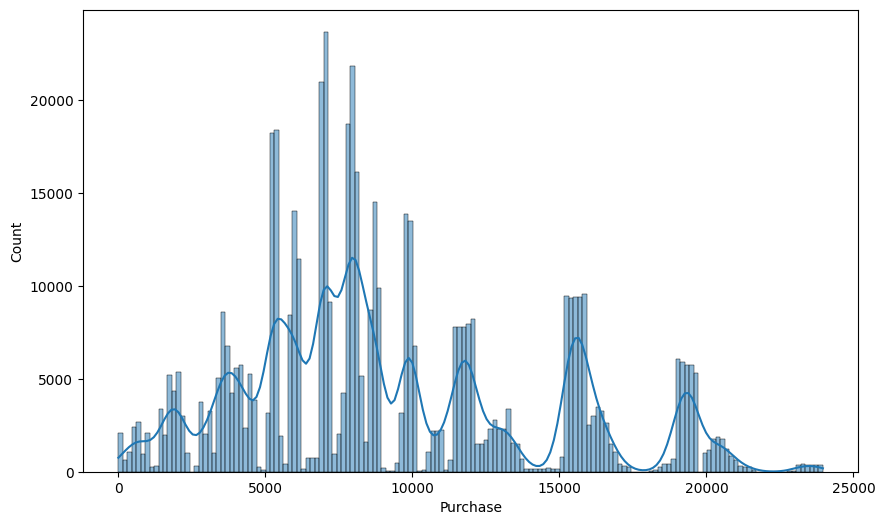

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=data["Purchase"], kde=True)
plt.show()

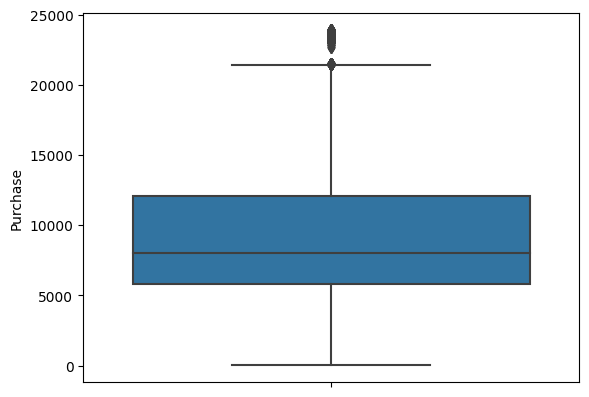

In [ ]:
sns.boxplot(data=data, y=data['Purchase'])
plt.show()

**Insights:**
1. From the graphs above we can clearly see there are outliers present in Purchase.
2. A high count of purchases occurs between 5,000 and 10,000.
3. product category 1,5 and 8 perform the best.
4. Occupation 0, 4 and 7 perform the best whereas 8 has the least amount of purchases
5. Most of the customers are males
6. More customers are single than married

## Bivariate Analysis

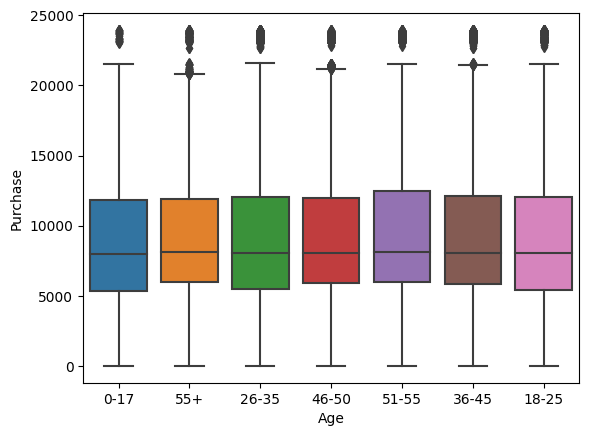

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data["Age"])
plt.show()

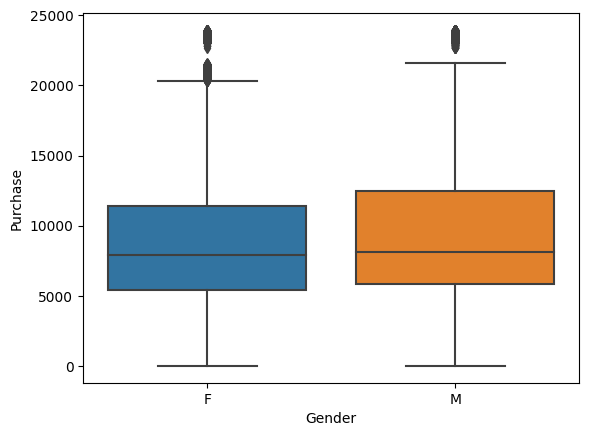

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data["Gender"])
plt.show()

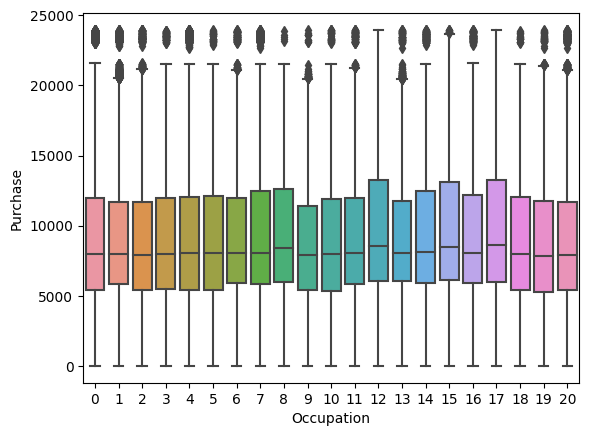

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data["Occupation"])
plt.show()

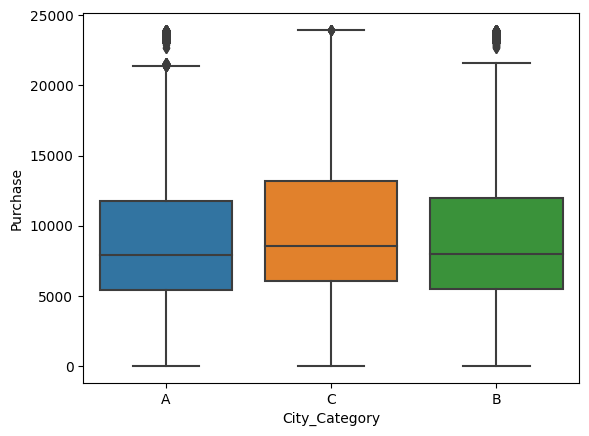

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data["City_Category"])
plt.show()

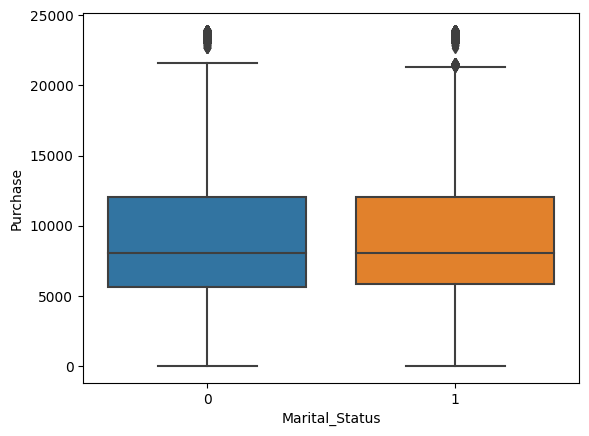

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data["Marital_Status"])
plt.show()

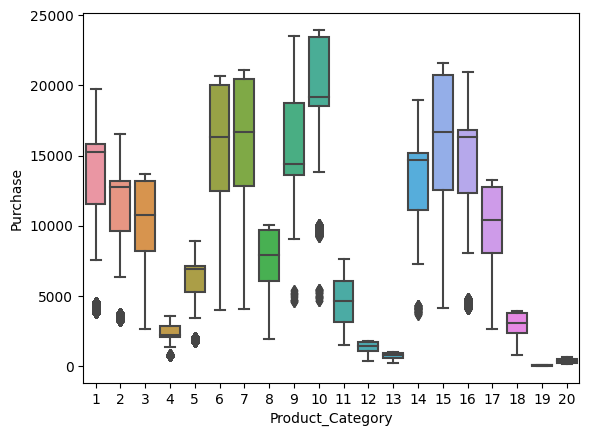

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data["Product_Category"])
plt.show()

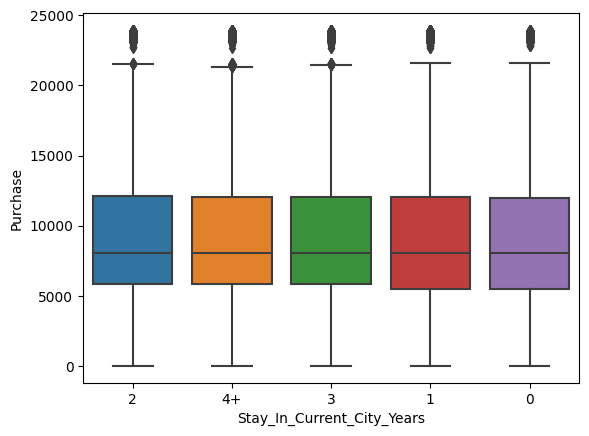

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data["Stay_In_Current_City_Years"])
plt.show()

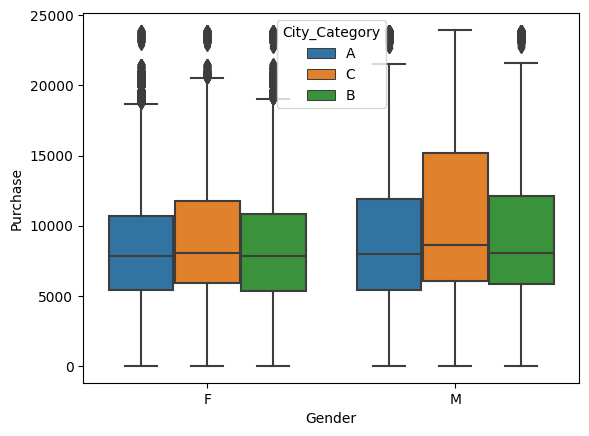

In [ ]:
sns.boxplot(data=data, y=data['Purchase'], x=data['Gender'], hue=data['City_Category'])
plt.show()

**Insghts:**
1. We can see that outliers are common across all the attributes in relation to purchases
2. There is similar purchase behaviour between age, gender, occupation, stay in the current city years, marital status, city category and the purchase attribute.
3. Product category is the only attribute that has some variations. With product 10 being the costliest
4. Male customers in city category C seems to spend more than males in other city categories

In [ ]:
data.groupby(["Gender"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
data.groupby(["Marital_Status"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
data.groupby(["Age"])["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
data.groupby(["Gender"]).nunique()

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Gender,,,,,,,,,
F,1666,3367,7,21,3,5,2,20,14704
M,4225,3588,7,21,3,5,2,20,17547


## Q: Are women spending more money per transaction than men? Why or Why not?

In [ ]:
gender_amt = data.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index()
gender_amt

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
gender_amt["Gender"].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

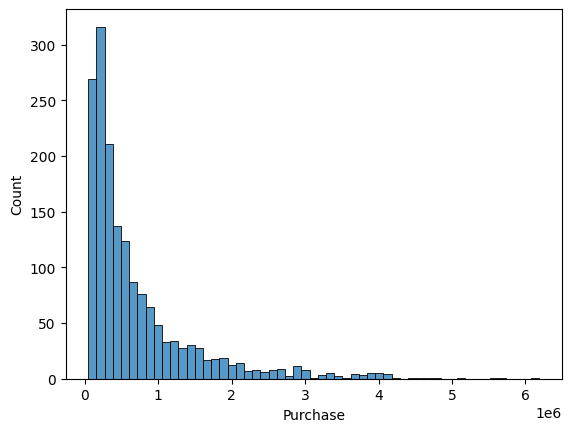

In [ ]:
#female expendature
sns.histplot(data=gender_amt[gender_amt['Gender']=='F']['Purchase'])
plt.show()

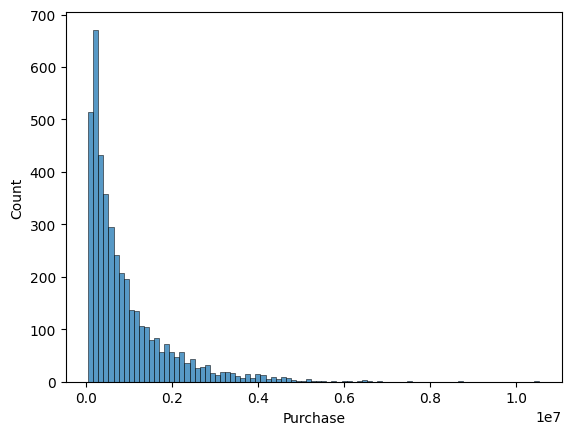

In [ ]:
#Male expendature
sns.histplot(data=gender_amt[gender_amt['Gender']=='M']['Purchase'])
plt.show()

In [ ]:
male_avg = gender_amt[gender_amt['Gender']=='M']['Purchase'].mean()
print(male_avg)
female_avg = gender_amt[gender_amt['Gender']=='F']['Purchase'].mean()
print(female_avg)

925344.4023668639
712024.3949579832


**Insight:** Men on avg spend more than women

## Q: Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
# Parameters
sample_size = 300
iteration = 1000


In [ ]:
male_sample_means=[data.loc[data["Gender"]=="M"]["Purchase"].sample(sample_size,replace=True).mean() for i in range(iteration)]

In [ ]:
print("male sample min :",np.min(male_sample_means))
print("male sample max :",np.max(male_sample_means))

male sample min : 8376.063333333334
male sample max : 10482.42


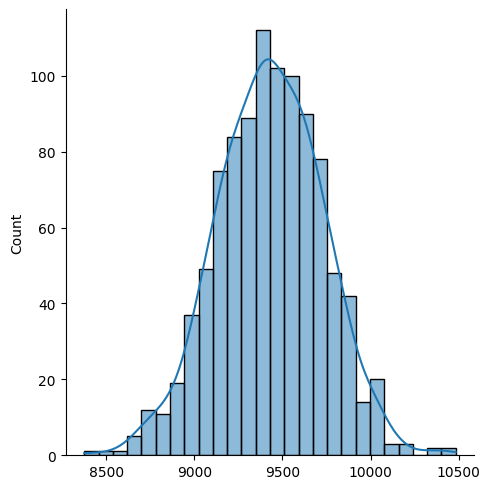

In [ ]:
sns.displot(male_sample_means,kde=True)

In [ ]:
female_sample_means=[data.loc[data["Gender"]=="F"]["Purchase"].sample(sample_size,replace=True).mean() for i in range(iteration)]

In [ ]:
print("female sample min :",np.min(female_sample_means))
print("female sample max :",np.max(female_sample_means))

female sample min : 7927.586666666667
female sample max : 9705.116666666667


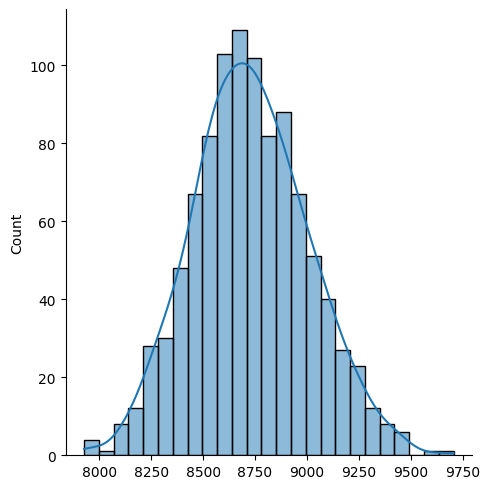

In [ ]:
sns.displot(female_sample_means,kde=True)

In [ ]:
# 95 % Confidence - Male
male_upper_limit = np.mean(male_sample_means)+1.96*(np.std(male_sample_means))
male_lower_limit = np.mean(male_sample_means)-1.96*(np.std(male_sample_means))
print("male Upper Limit : ",male_upper_limit)
print("male Lower Limit : ",male_lower_limit)


male Upper Limit :  10014.830736294332
male Lower Limit :  8844.665417039005


In [ ]:
# 95 % Confidence - Female
female_upper_limit = np.mean(female_sample_means)+1.96*(np.std(female_sample_means))
female_lower_limit = np.mean(female_sample_means)-1.96*(np.std(female_sample_means))
print("female Upper Limit : ",female_upper_limit)
print("female Lower Limit : ",female_lower_limit)

female Upper Limit :  9270.315445678407
female Lower Limit :  8186.564627654923


**Insight :** Since the confidence intervals for 95% is overlapping for males and females, we can't say with 95% confidence that male mean is greater than female. So we reduce the confidence interval from 95% to 90%.

In [ ]:
# 90 % Confidence - Male
male_upper_limit = np.mean(male_sample_means)+1.64*(np.std(male_sample_means))
male_lower_limit = np.mean(male_sample_means)-1.64*(np.std(male_sample_means))
print("male Upper Limit : ",male_upper_limit)
print("male Lower Limit : ",male_lower_limit)

male Upper Limit :  9919.307036763286
male Lower Limit :  8940.18911657005


In [ ]:
# 90 % Confidence - Female
female_upper_limit = np.mean(female_sample_means)+1.64*(np.std(female_sample_means))
female_lower_limit = np.mean(female_sample_means)-1.64*(np.std(female_sample_means))
print("female Upper Limit : ",female_upper_limit)
print("female Lower Limit : ",female_lower_limit)

female Upper Limit :  9181.845991145878
female Lower Limit :  8275.034082187452


**Insight :** We still find overlap between male and female means at 90% confidence interval. So we must increase the sample size

Increasing the sample size to 600

In [ ]:
sample_size1 = 600
iteration1 = 1000

In [ ]:
male_sample_means1=[data.loc[data["Gender"]=="M"]["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
female_sample_means1=[data.loc[data["Gender"]=="F"]["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
print("male sample min :",np.min(male_sample_means1))
print("male sample max :",np.max(male_sample_means1))

male sample min : 8815.891666666666
male sample max : 10034.741666666667


In [ ]:
print("female sample min :",np.min(female_sample_means1))
print("female sample max :",np.max(female_sample_means1))

female sample min : 8174.981666666667
female sample max : 9319.431666666667


In [ ]:
# 95 % Confidence - Male
male_upper_limit1 = np.mean(male_sample_means1)+1.96*(np.std(male_sample_means1))
male_lower_limit1 = np.mean(male_sample_means1)-1.96*(np.std(male_sample_means1))
print("male Upper Limit : ",male_upper_limit1)
print("male Lower Limit : ",male_lower_limit1)

male Upper Limit :  9845.476847127364
male Lower Limit :  9044.133522872635


In [ ]:
# 95 % Confidence - Female
female_upper_limit1 = np.mean(female_sample_means1)+1.96*(np.std(female_sample_means1))
female_lower_limit1 = np.mean(female_sample_means1)-1.96*(np.std(female_sample_means1))
print("female Upper Limit : ",female_upper_limit1)
print("female Lower Limit : ",female_lower_limit1)

female Upper Limit :  9107.277010136364
female Lower Limit :  8361.781539863638


**Insight :** Since the confidence intervals for 95% is overlapping for males and females, we can't say with 95% confidence that male mean is greater than female. So we reduce the confidence interval from 95% to 90%.

In [ ]:
# 90 % Confidence - Male
male_upper_limit1 = np.mean(male_sample_means1)+1.64*(np.std(male_sample_means1))
male_lower_limit1 = np.mean(male_sample_means1)-1.64*(np.std(male_sample_means1))
print("male Upper Limit : ",male_upper_limit1)
print("male Lower Limit : ",male_lower_limit1)


male Upper Limit :  9780.061065555548
male Lower Limit :  9109.54930444445


In [ ]:
# 90 % Confidence - Female
female_upper_limit1 = np.mean(female_sample_means1)+1.64*(np.std(female_sample_means1))
female_lower_limit1 = np.mean(female_sample_means1)-1.64*(np.std(female_sample_means1))
print("female Upper Limit : ",female_upper_limit1)
print("female Lower Limit : ",female_lower_limit1)

female Upper Limit :  9046.420237052875
female Lower Limit :  8422.638312947127


Sample size: 300
1. 95% confidence -->  
male:(8865.87 , 10027.95),
female: (7892.02 , 9726.32)

2. 90% confidence -->  
male:(8960.74 , 9933.09),
female: (8267.20 , 9196.91)

Sample size: 600
3. 95% confidence -->  
male:(9034.69 , 9831.45),
female: (8348.49 , 9102.87)

4. 90% confidence -->  
male:(9099.73 , 9766.41),
female: (8410.07 , 9041.29)


**Insight :**
1. We can now say with 90% confidence that the male mean expedature is greater than female mean expendature since there is no overlap.
2. This may be because males are doing the purchasing for females or females salaries are lesser
3. We will have to get more details on the customers salaries or check whether male-based products are of better quality than female-based products.

## Q: Results when the same activity is performed for Married vs Unmarried

In [ ]:
sample_size1 = 600
iteration1 = 1000

In [ ]:
single_sample_means1=[data.loc[data["Marital_Status"]==0]["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
married_sample_means1=[data.loc[data["Marital_Status"]==1]["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
print("single sample min :",np.min(single_sample_means1))
print("single sample max :",np.max(single_sample_means1))

single sample min : 8605.31
single sample max : 9853.061666666666


In [ ]:
print("married sample min :",np.min(married_sample_means1))
print("married sample max :",np.max(married_sample_means1))

married sample min : 8632.935
married sample max : 9811.925


In [ ]:
# 95 % Confidence - Single
single_upper_limit1 = np.mean(single_sample_means1)+1.96*(np.std(single_sample_means1))
single_lower_limit1 = np.mean(single_sample_means1)-1.96*(np.std(single_sample_means1))
print("single Upper Limit : ",single_upper_limit1)
print("single Lower Limit : ",single_lower_limit1)

single Upper Limit :  9681.32490208052
single Lower Limit :  8860.987004586146


In [ ]:
# 95 % Confidence - married
married_upper_limit1 = np.mean(married_sample_means1)+1.96*(np.std(married_sample_means1))
married_lower_limit1 = np.mean(married_sample_means1)-1.96*(np.std(married_sample_means1))
print("married Upper Limit : ",married_upper_limit1)
print("married Lower Limit : ",married_lower_limit1)

married Upper Limit :  9654.539347976703
married Lower Limit :  8866.924652023297


Increasing sample size to 2000
and a 90% confidence interval




In [ ]:
sample_size1 = 2000
iteration1 = 1000

In [ ]:
single_sample_means1=[data.loc[data["Marital_Status"]==0]["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
married_sample_means1=[data.loc[data["Marital_Status"]==1]["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
print("single sample min :",np.min(single_sample_means1))
print("single sample max :",np.max(single_sample_means1))

single sample min : 8902.8915
single sample max : 9595.2605


In [ ]:
print("married sample min :",np.min(married_sample_means1))
print("married sample max :",np.max(married_sample_means1))

married sample min : 8899.2985
married sample max : 9599.2575


In [ ]:
# 95 % Confidence - Single
single_upper_limit1 = np.mean(single_sample_means1)+1.96*(np.std(single_sample_means1))
single_lower_limit1 = np.mean(single_sample_means1)-1.96*(np.std(single_sample_means1))
print("single Upper Limit : ",single_upper_limit1)
print("single Lower Limit : ",single_lower_limit1)

single Upper Limit :  9486.22062345404
single Lower Limit :  9056.18977854596


In [ ]:
# 95 % Confidence - married
married_upper_limit1 = np.mean(married_sample_means1)+1.96*(np.std(married_sample_means1))
married_lower_limit1 = np.mean(married_sample_means1)-1.96*(np.std(married_sample_means1))
print("married Upper Limit : ",married_upper_limit1)
print("married Lower Limit : ",married_lower_limit1)

married Upper Limit :  9480.282133554125
married Lower Limit :  9044.134086445874


In [ ]:
# 90 % Confidence - Single
single_upper_limit1 = np.mean(single_sample_means1)+1.64*(np.std(single_sample_means1))
single_lower_limit1 = np.mean(single_sample_means1)-1.64*(np.std(single_sample_means1))
print("single Upper Limit : ",single_upper_limit1)
print("single Lower Limit : ",single_lower_limit1)

single Upper Limit :  9451.116064686035
single Lower Limit :  9091.294337313966


In [ ]:
# 90 % Confidence - married
married_upper_limit1 = np.mean(married_sample_means1)+1.64*(np.std(married_sample_means1))
married_lower_limit1 = np.mean(married_sample_means1)-1.64*(np.std(married_sample_means1))
print("married Upper Limit : ",married_upper_limit1)
print("married Lower Limit : ",married_lower_limit1)

married Upper Limit :  9444.678211341206
married Lower Limit :  9079.738008658793


**Insight:**
1. We find that there is overlapping for all sample sizes and confidence intervals for married vs unmarried
2. the analysis does not provide evidence to support the hypothesis that marital status has a significant impact on the variable you were investigating. In other words, being married or unmarried does not appear to be a significant factor influencing the parameter of interest.

## Q: Results when the same activity is performed for Age

In [ ]:
sample_size1 = 1000
iteration1 = 1000

In [ ]:
zerotoseven_sample_means1=[data.loc[data["Age"]=='0-17']["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
eighttofive_sample_means1=[data.loc[data["Age"]=='18-25']["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
sixtofive_sample_means1=[data.loc[data["Age"]=='26-35']["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
threetofive_sample_means1=[data.loc[data["Age"]=='36-45']["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
fourtofive_sample_means1=[data.loc[data["Age"]=='46-50']["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
fivetofive_sample_means1=[data.loc[data["Age"]=='51-55']["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
fiveplus_sample_means1=[data.loc[data["Age"]=='55+']["Purchase"].sample(sample_size1,replace=True).mean() for i in range(iteration1)]

In [ ]:
# 95 % Confidence - 0-17
zerotoseven_upper_limit1 = np.mean(zerotoseven_sample_means1)+1.96*(np.std(zerotoseven_sample_means1))
zerotoseven_lower_limit1 = np.mean(zerotoseven_sample_means1)-1.96*(np.std(zerotoseven_sample_means1))
print("0-17 Upper Limit : ",zerotoseven_upper_limit1)
print("0-17 Lower Limit : ",zerotoseven_lower_limit1)

0-17 Upper Limit :  9254.50397625682
0-17 Lower Limit :  8628.94025774318


In [ ]:
# 95 % Confidence - 18-25
eighttofive_upper_limit1 = np.mean(eighttofive_sample_means1)+1.96*(np.std(eighttofive_sample_means1))
eighttofive_lower_limit1 = np.mean(eighttofive_sample_means1)-1.96*(np.std(eighttofive_sample_means1))
print("18-25 Upper Limit : ",eighttofive_upper_limit1)
print("18-25 Lower Limit : ",eighttofive_lower_limit1)

18-25 Upper Limit :  9475.688697127925
18-25 Lower Limit :  8854.189428872078


In [ ]:
# 95 % Confidence - 26-35
sixtofive_upper_limit1 = np.mean(sixtofive_sample_means1)+1.96*(np.std(sixtofive_sample_means1))
sixtofive_lower_limit1 = np.mean(sixtofive_sample_means1)-1.96*(np.std(sixtofive_sample_means1))
print("26-35 Upper Limit : ",sixtofive_upper_limit1)
print("26-35 Lower Limit : ",sixtofive_lower_limit1)

26-35 Upper Limit :  9559.51905642153
26-35 Lower Limit :  8935.837755578468


In [ ]:
# 95 % Confidence - 36-45
threetofive_upper_limit1 = np.mean(threetofive_sample_means1)+1.96*(np.std(threetofive_sample_means1))
threetofive_lower_limit1 = np.mean(threetofive_sample_means1)-1.96*(np.std(threetofive_sample_means1))
print("36-45 Upper Limit : ",threetofive_upper_limit1)
print("36-45 Lower Limit : ",threetofive_lower_limit1)

36-45 Upper Limit :  9638.028097984186
36-45 Lower Limit :  9028.23398201581


In [ ]:
# 95 % Confidence - 46-50
fourtofive_upper_limit1 = np.mean(fourtofive_sample_means1)+1.96*(np.std(fourtofive_sample_means1))
fourtofive_lower_limit1 = np.mean(fourtofive_sample_means1)-1.96*(np.std(fourtofive_sample_means1))
print("46-50 Upper Limit : ",fourtofive_upper_limit1)
print("46-50 Lower Limit : ",fourtofive_lower_limit1)

46-50 Upper Limit :  9526.816321812668
46-50 Lower Limit :  8891.784572187335


In [ ]:
# 95 % Confidence - 51-55
fivetofive_upper_limit1 = np.mean(fivetofive_sample_means1)+1.96*(np.std(fivetofive_sample_means1))
fivetofive_lower_limit1 = np.mean(fivetofive_sample_means1)-1.96*(np.std(fivetofive_sample_means1))
print("51-55 Upper Limit : ",fivetofive_upper_limit1)
print("51-55 Lower Limit : ",fivetofive_lower_limit1)

51-55 Upper Limit :  9852.83354737003
51-55 Lower Limit :  9226.141452629969


In [ ]:
# 95 % Confidence - 55+
fiveplus_upper_limit1 = np.mean(fiveplus_sample_means1)+1.96*(np.std(fiveplus_sample_means1))
fiveplus_lower_limit1 = np.mean(fiveplus_sample_means1)-1.96*(np.std(fiveplus_sample_means1))
print("55+ Upper Limit : ",fiveplus_upper_limit1)
print("55+ Lower Limit : ",fiveplus_lower_limit1)

55+ Upper Limit :  9656.893123176624
55+ Lower Limit :  9021.846080823378



1. Age 0-17 confidence interval of means: (8627.82, 9245.69)
2. Age 18-25 confidence interval of means: (8860.92, 9476.98)
3. Age 26-35 confidence interval of means: (8935.23, 9562.68)
4. Age 36-45 confidence interval of means: (9024.06, 9633.68)
5. Age 46-50 confidence interval of means: (8905.11,9511.87)
6. Age 51-55 confidence interval of means: (9218.33, 9870.63)
7. Age 55+ confidence interval of means: (9035.47, 9650.84)


**Insight:**
1. The overlapping confidence intervals indicate that the variable's mean values are relatively consistent across different age groups. In other words, age alone does not appear to be a significant factor influencing
2. The confidence intervals for the means of all age groups overlap with one another. This suggests that, within the chosen confidence level, there are no statistically significant differences in the variable of interest across these age groups.
3. The consistent lack of significant differences across all age groups, coupled with the use of bootstrapping (a resampling technique that is robust to assumptions about data distribution), adds confidence to the conclusion that age is unlikely to be a significant driver of variations in the variable.

# **Recommendations:**

1. Male clearly spend more than female customers. Company can focus on retainig male customers and coming up with new offers or products to increase the purchases amongst female audience
2. Get more information on salaries of customers to check the hypothesis of men having higher salaries relate to their higher expendature
3. Analysis of male-based products vs female based products.
4. We still cannot confidently say unmarried are purchasing more than married due to overlap in their confidence intervals.
5. Product category 1,5 and 8 perform the best and shows a high demand for these products and the company would benefit from giving more focus to these products.
6. Product categories 9,14,17,19 and 20 are performing very poorly and the company should consider droppng them.
6. City category B have the highest amount of purchases and should focus on getting more customers in this city.
7. Large amount of purchases between 5k and 10k and the company should focus more on these mid range products to increase the sales.
8. People who have stayed in a city for a year make the most amount of purchases and require further analysis to see what influences their purchase decisions. These insights will increase sales further in a well performing category.
9. Initial data exploration showed that age group 26 -35 had the highest amount of purchases but we can't say with confidence that this is true as there is overlap in their confidence intervals
10. Male customers in city category C seems to spend more than males in other city categories. More focus for males in this city category could yield more sales.